[2. 3. 7. 2. 5. 2. 2. 2. 3.]
[ 4.  5. 12.  4.  8.  4.  4.  4. 10.]
[ 4.  7. 11.  4.  7.  4.  4.  4.  4.]
[2. 3. 7. 2. 4. 2. 3. 3. 2.]
[1. 0. 2. 1. 0. 0. 1. 1. 6.]
[0. 0. 0. 0. 0. 0. 0. 0. 3.]
[1. 1. 3. 1. 2. 1. 1. 1. 0.]
[0. 2. 3. 1. 1. 1. 1. 2. 9.]
[3. 2. 8. 2. 5. 3. 2. 2. 7.]
[ 4.  4. 10.  4.  7.  3.  4.  4.  2.]
[ 3.  4. 11.  3.  8.  4.  4.  4.  3.]
[0. 0. 0. 0. 0. 0. 0. 0. 4.]
[0. 0. 0. 0. 0. 0. 1. 0. 5.]
[1. 1. 3. 1. 2. 1. 1. 1. 9.]
[1. 1. 3. 1. 2. 1. 2. 2. 0.]
[1. 1. 2. 1. 1. 1. 1. 1. 0.]
[1. 1. 4. 1. 2. 1. 3. 3. 3.]
[1. 1. 3. 1. 2. 1. 2. 2. 7.]
[ 0.  0.  0.  0.  0.  0.  0.  0. 10.]
[1. 1. 3. 1. 2. 1. 2. 2. 3.]
[1. 1. 3. 1. 2. 1. 2. 2. 1.]
[1. 1. 3. 1. 2. 1. 2. 2. 2.]
[1. 1. 3. 1. 2. 1. 2. 2. 6.]
[1. 1. 3. 1. 2. 1. 1. 1. 7.]
[2. 3. 6. 2. 4. 2. 3. 3. 9.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 9.]
[1. 1. 2. 1. 1. 1. 1. 1. 1.]
[1. 1. 3. 1. 1. 1. 2. 2. 5.]
[2. 2. 7. 2. 5. 2. 4. 4. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 4.]
[ 1.  1.  2.  1.  2.  1.  1.  1. 10.]
[0. 0. 0. 0. 0. 0.

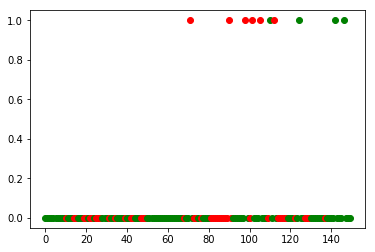

In [7]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
# Load libraries

import pandas
import csv
from numpy import vectorize
from pandas import DataFrame
from pandas.io.parsers import TextFileReader
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors.kde import KernelDensity
import random
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from scipy.sparse import dia_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd

# read labeld data for user i

testUser = 5

# read labeld data

dataset = \
    pandas.read_csv('../Detecting-Cyber-Attacks-Kaggle-Callenge/data/partial_labels.csv'
                    )

# for all

(x, segments) = dataset.axes
array = dataset.values

z = np.reshape(array[testUser, 1:], -1)
z = z.astype('int')
Y_train = z[0:50]
Y_test = z

masquerder = []

# read instructions

fileName = array[testUser, 0]
instructions = \
    pandas.read_fwf('../Detecting-Cyber-Attacks-Kaggle-Callenge/data/FraudedRawData/'
                     + fileName, header=None)
arr = np.reshape(instructions.values, (150, 100))
user_test = np.array(arr[0:, :])
user_train = arr[:50, :]
hack = []

for i in range(10):
    labeld_data = np.reshape(array[i, 1:], -1)
    labeld_data = labeld_data.astype('int')
    fileName = array[i, 0]
    instructions = \
        pandas.read_fwf('../Detecting-Cyber-Attacks-Kaggle-Callenge/data/FraudedRawData/'
                         + fileName, header=None)
    arr = np.reshape(instructions.values, (150, 100))
    for j in range(150):
        if labeld_data[j] == 1:
            hack.append(arr[j, :])

user_train = np.array(user_train)
hack = np.array(hack)
all = np.concatenate((user_train, hack))

trainCorpus = []
corpus = []
test_corpus = []

for i in range(len(user_test)):
    s = ' '.join(user_test[i, :])
    test_corpus.append(s)

for i in range(len(all)):
    s = ' '.join(all[i, :])
    if i < 50:
        trainCorpus.append(s)
        corpus.append(s)
    else:
        corpus.append(s)

vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=0.5)
vectorizer.fit_transform(trainCorpus)
train_all = vectorizer.transform(corpus)
x_test = vectorizer.transform(test_corpus)

##################################################################

wordsCount = {}
uniqe = set()
unique_feature_train = np.zeros(150)
unique_feature_test = np.zeros(150)
for i in range(len(all)):
    for j in range(100):
        if i < 50:
            uniqe.add(all[i][j])
            unique_feature_train[i] = random.randint(0, 10)
        else:
            if all[i][j] not in uniqe:
                unique_feature_train[i] = random.randint(10, 20)

for i in range(len(user_test)):
    if i < 50:
        unique_feature_test[i] = random.randint(0, 10)
    for j in range(100):
        if user_test[i][j] not in uniqe:
            unique_feature_test[i] = unique_feature_test[i] + 1

##################################################################

train_all = np.array(train_all.toarray())
x_test = np.array(x_test.toarray())
classes = np.concatenate((np.zeros(50), np.ones(100)))

train_all = np.c_[train_all, unique_feature_train]
x_test = np.c_[x_test, unique_feature_test]

for i in range(len(train_all)):
    print(train_all[i, :])

clf = SVC(gamma='auto', kernel='linear')
clf.fit(train_all, classes)

predicts = clf.predict(x_test)

# print(predicts)

##########################################

hackerf = 0
userf = 0
for i in range(len(predicts)):
    if predicts[i] == 1:
        if Y_test[i] == 1:
            plt.plot(i, Y_test[i], 'go')
        else:
            plt.plot(i, Y_test[i], 'ro')
            hackerf = hackerf + 1
    else:
        if Y_test[i] == 0:
            plt.plot(i, Y_test[i], 'go')
        else:
            plt.plot(i, Y_test[i], 'ro')
            userf = userf + 1

print ('user-false: ' + str(userf) + '  ' + 'hack-false: ' + str(hackerf))
plt.show()

			